<a href="https://colab.research.google.com/github/Alfinnn24/PCVK_Ganjil_2025/blob/master/Modul_7_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM FILTER
1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.

2. Berikut merupakan langkah-langkah yang dapat dilakukan:

a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.

b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [1]:
# Import library
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

# c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

In [3]:
def convolution2d(image, kernel, stride, padding):
    """
    Fungsi untuk melakukan konvolusi 2D pada sebuah citra tanpa library bawaan.

    Args:
    - image (np.array): Citra masukan dalam bentuk matriks 2D numpy.
    - kernel (np.array): Kernel atau filter dalam bentuk matriks 2D numpy.
    - stride (int): Besar pergeseran kernel pada setiap langkah.
    - padding (int): Jumlah piksel nol yang ditambahkan di sekeliling citra.

    Returns:
    - np.array: Citra hasil konvolusi (feature map).
    """
    # 1. Menambahkan Padding pada citra masukan
    if padding > 0:
        image_padded = np.pad(image, pad_width=padding, mode='constant', constant_values=0)
    else:
        image_padded = image

    # Mengambil dimensi dari citra yang sudah diberi padding dan kernel
    (image_height, image_width) = image_padded.shape
    (kernel_height, kernel_width) = kernel.shape

    # 2. Menghitung dimensi output
    output_height = int(((image.shape[0] - kernel_height + 2 * padding) / stride) + 1)
    output_width = int(((image.shape[1] - kernel_width + 2 * padding) / stride) + 1)

    # 3. Membuat matriks output kosong
    output_image = np.zeros((output_height, output_width))

    # 4. Proses Konvolusi (Looping)
    # Proses ini merupakan implementasi dari pergeseran kernel pada citra
    # seperti diilustrasikan pada Gambar 2 di modul.
    for y in range(output_height):
        for x in range(output_width):
            # Tentukan posisi 'jendela' pada citra
            y_start = y * stride
            y_end = y_start + kernel_height
            x_start = x * stride
            x_end = x_start + kernel_width

            # Ambil 'jendela' dari citra yang sudah dipadding
            window = image_padded[y_start:y_end, x_start:x_end]

            # Lakukan perkalian elemen-demi-elemen dan jumlahkan
            # Ini adalah inti dari operasi konvolusi.
            convolution_sum = np.sum(window * kernel)

            # Simpan hasil ke matriks output
            output_image[y, x] = convolution_sum

    return output_image

# d. Load citra yang akan diproses dan ubah menjadi citra keabuan

Dimensi citra: (919, 735)


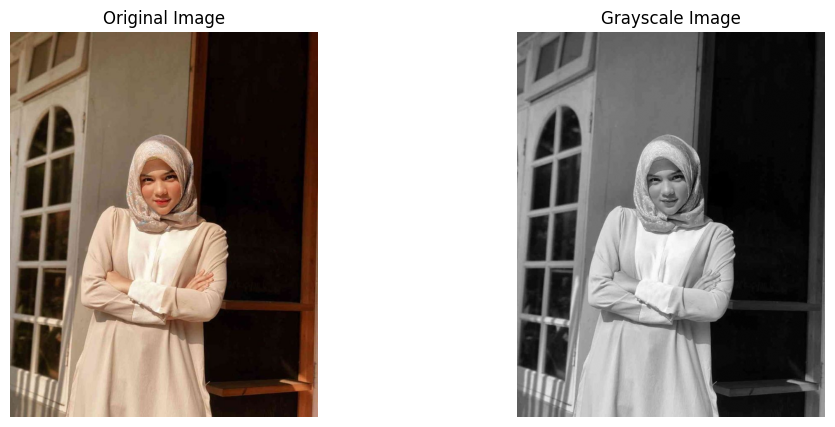

In [4]:
# Coba muat gambar dari path
img = cv.imread('/content/drive/MyDrive//PCVK/images/female.jpg')

# Ubah menjadi citra keabuan
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Tampilkan citra asli
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Tampilkan citra grayscale
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray')
print(f"Dimensi citra: {img_gray.shape}")
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening sebagai berikut:

In [5]:
# Mendefinisikan kernel sharpening
print("=== KERNEL SHARPENING ===")

# Kernel Sharpening
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

print("Kernel Sharpening:")
print(kernel_sharpen)
print(f"Dimensi kernel: {kernel_sharpen.shape}")

=== KERNEL SHARPENING ===
Kernel Sharpening:
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]
Dimensi kernel: (3, 3)


# f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya:

=== Hasil Konvolusi Filter Sharpen ===


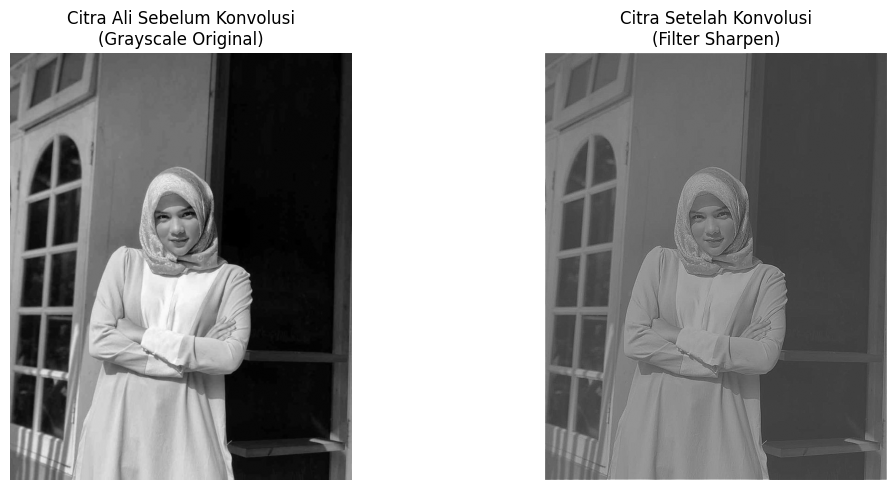

In [6]:
print("=== Hasil Konvolusi Filter Sharpen ===")

# Memanggil fungsi konvolusi dengan kernel sharpen
result_sharpen = convolution2d(img_gray, kernel_sharpen, stride=1, padding=1)

# Normalisasi hasil untuk menampilkan
result_sharpen_normalized = cv.normalize(result_sharpen, None, 0, 255, cv.NORM_MINMAX)
result_sharpen_uint8 = result_sharpen_normalized.astype(np.uint8)

# Menampilkan hasil sebelum dan sesudah konvolusi
plt.figure(figsize=(12, 5))

# Sebelum konvolusi
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Citra Ali Sebelum Konvolusi\n(Grayscale Original)')
plt.axis('off')

# Sesudah konvolusi
plt.subplot(1, 2, 2)
plt.imshow(result_sharpen_uint8, cmap='gray')
plt.title('Citra Setelah Konvolusi\n(Filter Sharpen)')
plt.axis('off')

plt.tight_layout()
plt.show()

# 3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut:

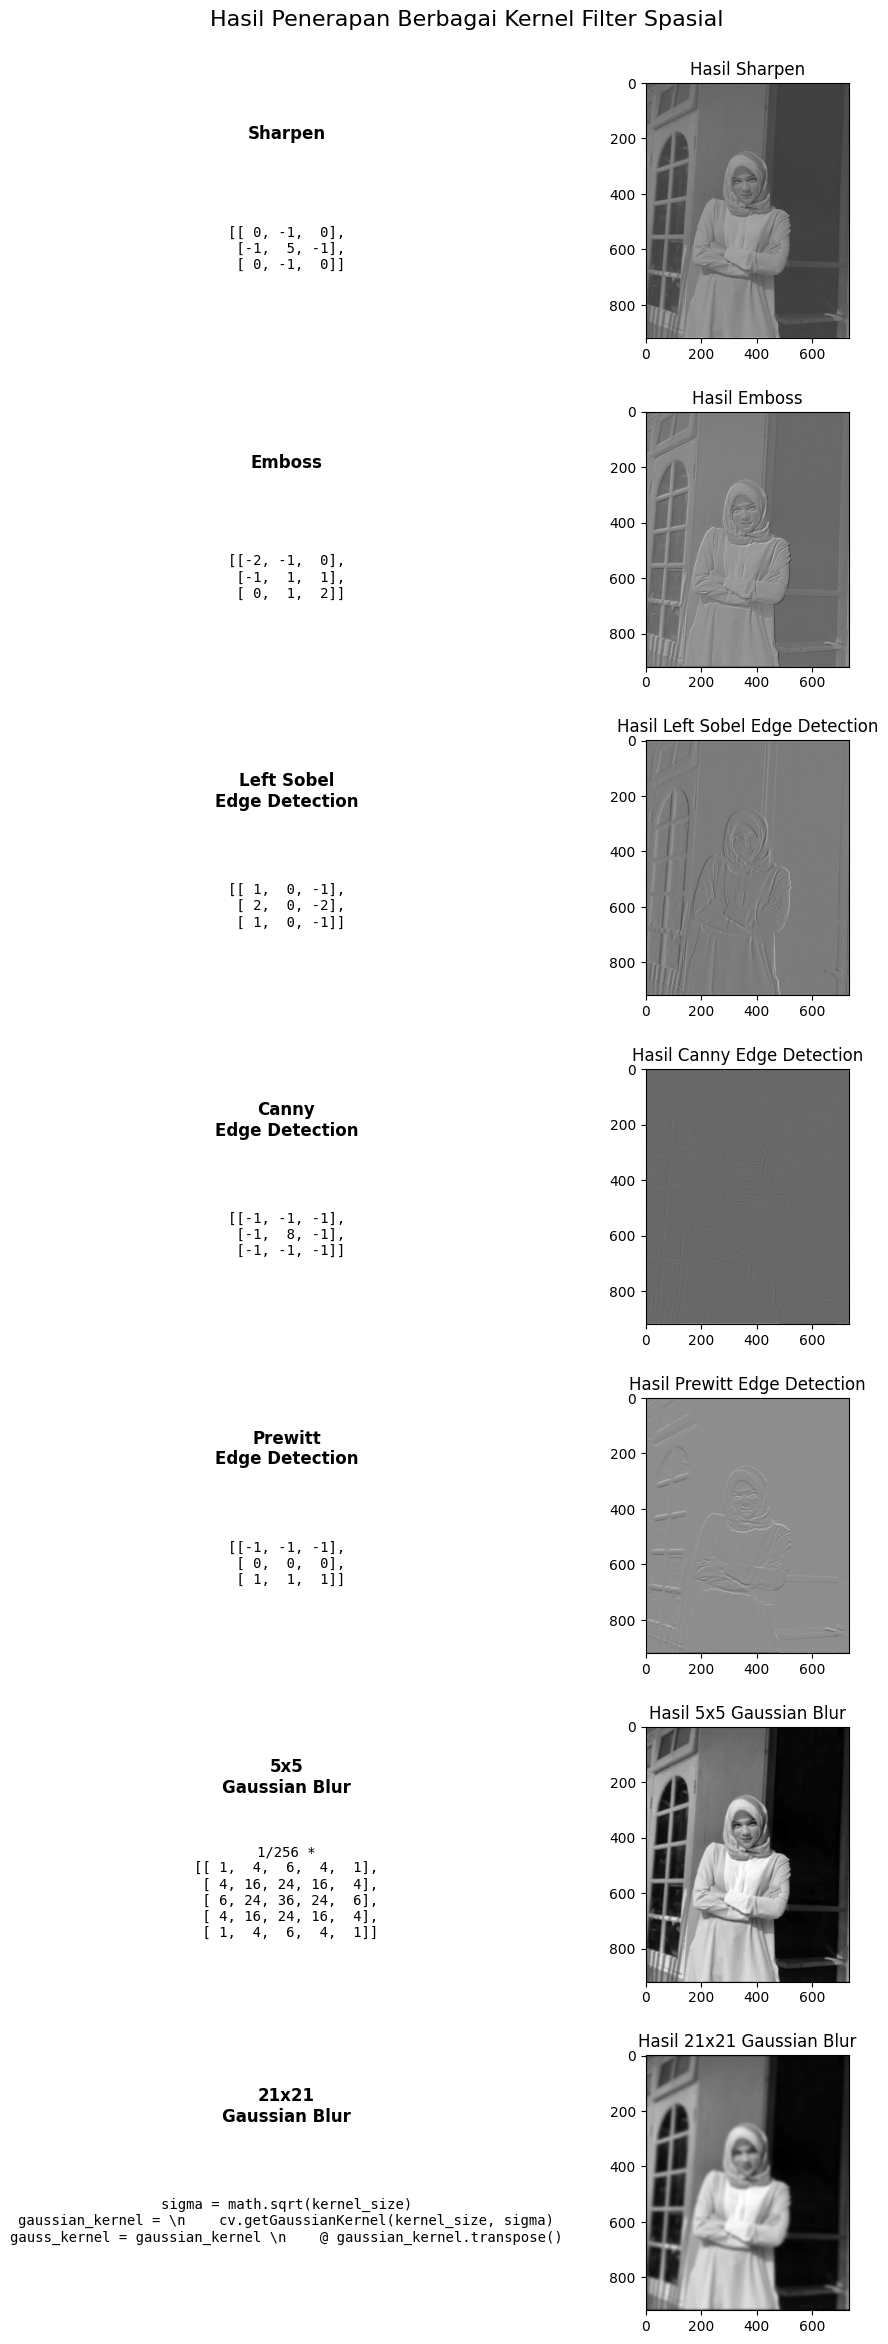

In [8]:
# LANGKAH 1: Mendefinisikan Smeua Kernel

# Kode untuk generate kernel Gaussian 21x21
gauss_21_code = (
    "sigma = math.sqrt(kernel_size)\n"
    "gaussian_kernel = \\n"
    "    cv.getGaussianKernel(kernel_size, sigma)\n"
    "gauss_kernel = gaussian_kernel \\n"
    "    @ gaussian_kernel.transpose()"
)
# Menghasilkan kernel Gaussian 21x21
kernel_size_21 = 21
sigma_21 = math.sqrt(kernel_size_21)
gaussian_kernel_1d = cv.getGaussianKernel(kernel_size_21, sigma_21)
kernel_gaussian_21x21 = gaussian_kernel_1d @ gaussian_kernel_1d.transpose()


filters_to_apply = [
    ("Sharpen",
     np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
     "[[ 0, -1,  0],\n [-1,  5, -1],\n [ 0, -1,  0]]"),

    ("Emboss",
     np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
     "[[-2, -1,  0],\n [-1,  1,  1],\n [ 0,  1,  2]]"),

    ("Left Sobel\nEdge Detection",
     np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]),
     "[[ 1,  0, -1],\n [ 2,  0, -2],\n [ 1,  0, -1]]"),

    ("Canny\nEdge Detection",
     np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
     "[[-1, -1, -1],\n [-1,  8, -1],\n [-1, -1, -1]]"),

    ("Prewitt\nEdge Detection",
     np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
     "[[-1, -1, -1],\n [ 0,  0,  0],\n [ 1,  1,  1]]"),

    ("5x5\nGaussian Blur",
     (1/256) * np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]]),
     "1/256 *\n[[ 1,  4,  6,  4,  1],\n [ 4, 16, 24, 16,  4],\n [ 6, 24, 36, 24,  6],\n [ 4, 16, 24, 16,  4],\n [ 1,  4,  6,  4,  1]]"),

    ("21x21\nGaussian Blur",
     kernel_gaussian_21x21,
     gauss_21_code)
]

# LANGKAH 2: Menerapkan Filter dan Menampilkan Hasil Sesuai Format
# Membuat grid subplot (1 baris per filter, 2 kolom utama)
fig, axes = plt.subplots(len(filters_to_apply), 2, figsize=(10, 24))
fig.suptitle('Hasil Penerapan Berbagai Kernel Filter Spasial\n', fontsize=16)

for i, (title, kernel, kernel_display) in enumerate(filters_to_apply):
    # Kolom Kiri: Operasi dan Kernel
    ax_left = axes[i, 0]
    ax_left.axis('off') # Hapus sumbu plot

    # Tampilkan nama operasi
    ax_left.text(0.5, 0.8, title, ha='center', va='center', fontsize=12, weight='bold')

    # Tampilkan matriks/kode kernel
    ax_left.text(0.5, 0.35, kernel_display, ha='center', va='center', fontsize=10, fontfamily='monospace')

    #  Kolom Kanan: Hasil Gambar
    ax_right = axes[i, 1]

    padding = kernel.shape[0] // 2
    filtered_image = convolution2d(img_gray, kernel, stride=1, padding=padding)

    ax_right.imshow(filtered_image, cmap='gray')
    ax_right.set_title(f"Hasil {title.replace('\n', ' ')}")

fig.tight_layout(pad=2.0)
plt.show()